### Using a random forest on the MNIST dataset
- How does it compare with simple MLP architectures?

In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist_train = np.genfromtxt('MNIST_data/mnist_train.csv', delimiter=',')
print('Label:', mnist_train[0, 0])
mnist_train[0:5, 1:]

Label: 5.0


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [3]:
mnist_test = np.genfromtxt('MNIST_data/mnist_test.csv', delimiter=',')
mnist_test[0:5, :]

array([[ 7.,  0.,  0., ...,  0.,  0.,  0.],
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
print(mnist_train.shape)
print(mnist_test.shape)

(60000, 785)
(10000, 785)


In [5]:
X_train = mnist_train[:, 1:]
Y_train = mnist_train[:, 0]
X_test = mnist_test[:, 1:]
Y_test = mnist_test[:, 0]

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


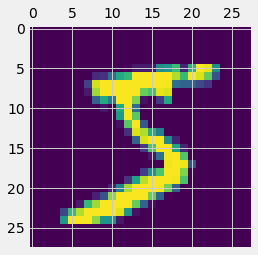

In [19]:
plt.style.use('fivethirtyeight')
plt.matshow(X_train[0, :].reshape(28, 28));

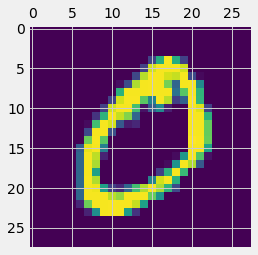

In [20]:
plt.matshow(X_train[1, :].reshape(28, 28));

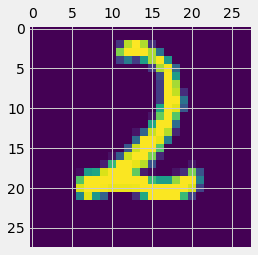

In [22]:
plt.matshow(X_train[122, :].reshape(28, 28));

### Model 1: Gini

In [27]:
list_f1_scores1 = []
list_recall_scores1 = []
for i in range(3, 71):
    random_forest1 = RandomForestClassifier(n_estimators=i, 
                                            criterion='gini', 
                                            max_depth=None, 
                                            min_samples_split=2, 
                                            min_samples_leaf=1, 
                                            min_weight_fraction_leaf=0.0, 
                                            max_features='auto', 
                                            max_leaf_nodes=None, 
                                            min_impurity_decrease=0.0, 
                                            min_impurity_split=None, 
                                            bootstrap=True, 
                                            random_state=None)
    random_forest1.fit(X_train, Y_train)
    y_hat = random_forest1.predict(X_test)
    score = f1_score(Y_test, y_hat, average='macro')
    list_f1_scores1.append(score)
    score = recall_score(Y_test, y_hat, average='macro')
    list_recall_scores1.append(score)

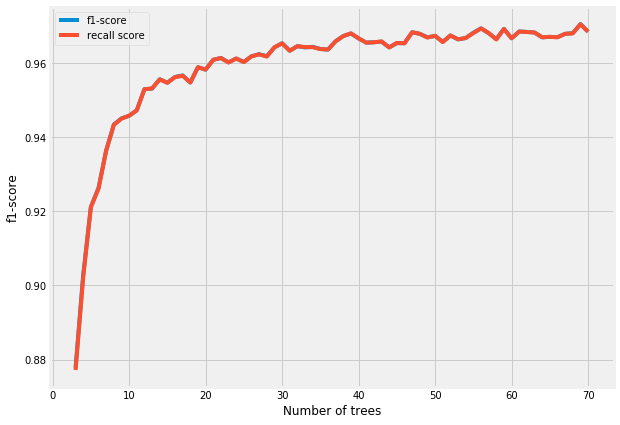

In [28]:
plt.figure(figsize=(9, 7))
x_units = list(range(3, 71))
plt.plot(x_units, list_f1_scores1, label='f1-score')
plt.plot(x_units, list_recall_scores1, label='recall score')
#plt.axis([0, 200, 0.4, 1.0])
plt.xlabel('Number of trees')
plt.ylabel('f1-score')
plt.legend()
plt.show()

### Model 2: Entropy

In [29]:
list_f1_scores2 = []
list_recall_scores2 = []
for i in range(3, 71):
    random_forest2 = RandomForestClassifier(n_estimators=i, 
                                            criterion='entropy', 
                                            max_depth=None, 
                                            min_samples_split=2, 
                                            min_samples_leaf=1, 
                                            min_weight_fraction_leaf=0.0, 
                                            max_features='log2', 
                                            max_leaf_nodes=None, 
                                            min_impurity_decrease=0.0, 
                                            min_impurity_split=None, 
                                            bootstrap=True, 
                                            random_state=None)
    random_forest2.fit(X_train, Y_train)
    y_hat = random_forest2.predict(X_test)
    score = f1_score(Y_test, y_hat, average='macro')
    list_f1_scores2.append(score)
    score = recall_score(Y_test, y_hat, average='macro')
    list_recall_scores2.append(score)

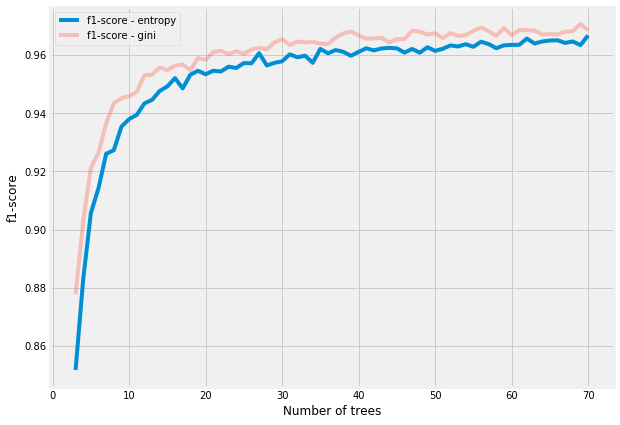

In [31]:
plt.figure(figsize=(9, 7))
x_units = list(range(3, 71))
plt.plot(x_units, list_f1_scores2, label='f1-score - entropy')
plt.plot(x_units, list_f1_scores1, label='f1-score - gini', alpha=0.3)
plt.xlabel('Number of trees')
plt.ylabel('f1-score')
plt.legend()
plt.show()

Model 1 with the gini criterion is showing better predictive performance with a higher average f1-score as the learning of the model proceeds from 3 sub-trees, on to 70 sub-trees. The gini model achieves an average f1-score at 70 trees of **0.96853**. 

In [34]:
list_f1_scores1[67] # index 67 is 70 trees

0.96853147756778601

In [35]:
random_forest_gini_70 = RandomForestClassifier(n_estimators=70, 
                                               criterion='gini', 
                                               max_depth=None, 
                                               min_samples_split=2, 
                                               min_samples_leaf=1, 
                                               min_weight_fraction_leaf=0.0, 
                                               max_features='auto', 
                                               max_leaf_nodes=None, 
                                               min_impurity_decrease=0.0, 
                                               min_impurity_split=None, 
                                               bootstrap=True, 
                                               random_state=None)

In [36]:
random_forest_gini_70.fit(X_train, Y_train)
y_hat = random_forest_gini_70.predict(X_test)
print(confusion_matrix(Y_test, y_hat))

[[ 969    0    1    0    0    3    3    1    3    0]
 [   0 1124    2    3    0    2    2    0    2    0]
 [   7    1  996    5    2    0    4    9    8    0]
 [   0    0   14  970    0    6    0    8    9    3]
 [   1    0    1    0  954    1    5    0    2   18]
 [   3    0    0   15    1  858    7    1    4    3]
 [   7    3    1    0    3    3  941    0    0    0]
 [   2    3   19    3    0    0    0  989    2   10]
 [   3    0    4   13    4    8    2    3  929    8]
 [   5    5    2    8   13    5    1    4    6  960]]


The digits that give the model the most trouble are the 3, 5, 7, 8, 9.  

The 3 is being misclassified as 2.  
The 4 is being misclassified as 9.  
The 5 is being misclassified as 3.  
The 7 is being misclassified as 2 and 9.  
The 8 is being misclassified as 3.  
The 9 is being misclassified as 4.  

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print(accuracy_score(Y_test, y_hat))

0.969
